In [55]:
import matplotlib.pyplot as plt
%matplotlib notebook
import networkx as nx
import numpy as np
from tp3_helpers import * 
from networkx.drawing.nx_agraph import graphviz_layout
from networkx.algorithms.community.quality import coverage, performance, modularity
from networkx.algorithms.community import LFR_benchmark_graph
import community
import time

In [ ]:
# cluster_sizes = [200] * 4
# p = 0.1
# q = 0.0001
# G = generate_random_graph(cluster_sizes, p = p, q = q)    
# pos=nx.spring_layout(G)
n = 2500
tau1 = 3
tau2 = 1.5
mu = 0.1
G = LFR_benchmark_graph(n, tau1, tau2, mu, average_degree=5, min_community=250, seed=10)

# EX1: Random Graphs

In [47]:
fname = "random_50.eps"

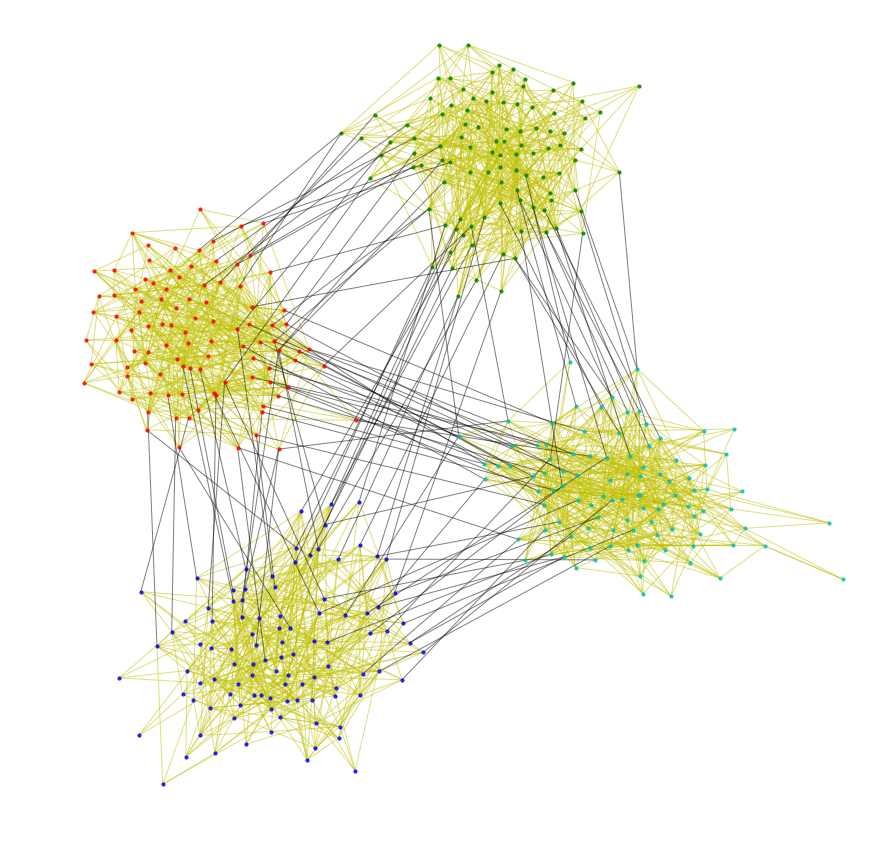

In [49]:
fig = plt.figure(figsize=(15, 15))
#pos=graphviz_layout(G)
#pos = nx.kamada_kawai_layout(G)
nx.draw_networkx_nodes(G, pos, nodelist=[node for node in G.nodes if G.nodes[node]["community"]==0], node_color='r', node_size=10, alpha=0.8)
nx.draw_networkx_nodes(G, pos, nodelist=[node for node in G.nodes if G.nodes[node]["community"]==1], node_color='b', node_size=10, alpha=0.8)
nx.draw_networkx_nodes(G, pos, nodelist=[node for node in G.nodes if G.nodes[node]["community"]==2], node_color='g', node_size=10, alpha=0.8)
nx.draw_networkx_nodes(G, pos, nodelist=[node for node in G.nodes if G.nodes[node]["community"]==3], node_color='c', node_size=10, alpha=0.8)

nx.draw_networkx_edges(G, pos, edgelist=[edge for edge in G.edges if G.edges[edge]["type"]=="in"], width=1, alpha=0.5, edge_color = 'y')
nx.draw_networkx_edges(G, pos, edgelist=[edge for edge in G.edges if G.edges[edge]["type"]=="out"], width=1, alpha=0.5, edge_color = 'k')

plt.axis('off')
plt.savefig(fname, dpi=1200, format="eps",
        transparent=True, bbox_inches="tight", pad_inches=0.1)

# Label propagration

In [5]:
start = time.time()
g = label_propagation(G, max_iter=50, num_community=4)
end = time.time()
print(start-end)

-1.2028794288635254


In [6]:
labels = [g.nodes[node]["label"] for node in g.nodes]
labels = list(set(labels))
for node in g.nodes:
    g.nodes[node]["label"] = labels.index(g.nodes[node]["label"])

D:\Ananconda\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


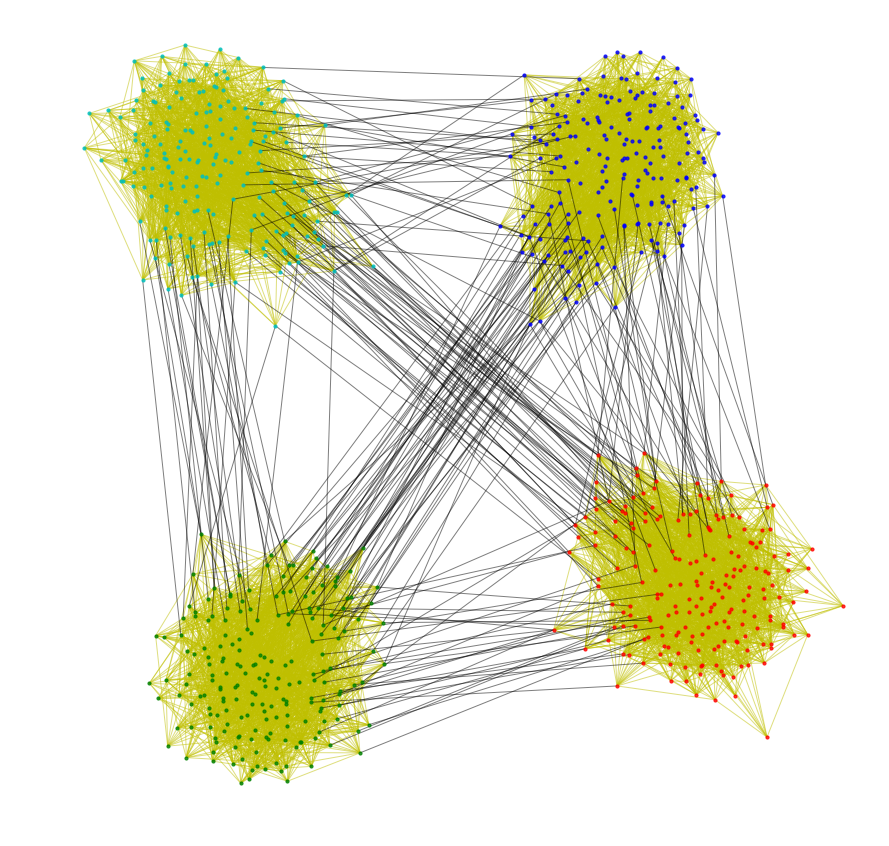

In [5]:
fig = plt.figure(figsize=(15, 15))
nx.draw_networkx_nodes(g, pos, nodelist=[node for node in G.nodes if G.nodes[node]["label"]==0], node_color='r', node_size=10, alpha=0.8)
nx.draw_networkx_nodes(g, pos, nodelist=[node for node in G.nodes if G.nodes[node]["label"]==1], node_color='b', node_size=10, alpha=0.8)
nx.draw_networkx_nodes(g, pos, nodelist=[node for node in G.nodes if G.nodes[node]["label"]==2], node_color='g', node_size=10, alpha=0.8)
nx.draw_networkx_nodes(g, pos, nodelist=[node for node in G.nodes if G.nodes[node]["label"]==3], node_color='c', node_size=10, alpha=0.8)

nx.draw_networkx_edges(g, pos, edgelist=[edge for edge in G.edges if G.edges[edge]["type"]=="in"], width=1, alpha=0.5, edge_color = 'y')
nx.draw_networkx_edges(g, pos, edgelist=[edge for edge in G.edges if G.edges[edge]["type"]=="out"], width=1, alpha=0.5, edge_color = 'k')

plt.axis('off')
plt.savefig(fname="lp50", dpi=1200, format="eps", transparent=True, bbox_inches="tight", pad_inches=0.1)

In [7]:
labels = [g.nodes[node]["label"] for node in g.nodes]
labels = list(set(labels))
partitions = []
for label in labels:
    partitions.append(set([node for node in g.nodes if g.nodes[node]["label"] == label]))

In [8]:
labels

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61]

In [9]:
modularity(G, partitions)

0.7233299046875484

In [10]:
performance(G, partitions)

0.9578261008807045

In [11]:
coverage(G, partitions)

0.7776502104860313

# New algorithm

In [46]:
start = time.time()
g = new_algorithm(G, max_size=1250)
end = time.time()
print(start-end)

-0.015622377395629883


In [47]:
labels = [g.nodes[node]["label"] for node in g.nodes]
labels = list(set(labels))
for node in g.nodes:
    g.nodes[node]["label"] = labels.index(g.nodes[node]["label"])

In [48]:
labels = [g.nodes[node]["label"] for node in g.nodes]
labels = list(set(labels))
partitions = []
for label in labels:
    partitions.append(set([node for node in g.nodes if g.nodes[node]["label"] == label]))

In [49]:
modularity(G, partitions)

0.42254248789006027

In [50]:
performance(G, partitions)

0.9255622097678142

In [51]:
coverage(G, partitions)

0.535399923459625

# Louvain

In [52]:
start = time.time()
partitions = community.best_partition(G)
end = time.time()
print(start-end)

-1.920912742614746


In [53]:
community.modularity(partitions, G)

0.8448603782582569

In [19]:
modularity(G, partitions)

TypeError: argument of type 'numpy.int32' is not iterable

In [ ]:
performance(G, partitions)

In [ ]:
coverage(G, partitions)